## Titanic Dataset
### Dataset Features:
1. survived: Whether the passenger survived (0 = No, 1 = Yes).
2. pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
3. sex: Gender of the passenger.
4. age: Age of the passenger in years. Some values are missing.
5. sibsp: Number of siblings/spouses aboard the Titanic.
6. parch: Number of parents/children aboard the Titanic.
7. fare: Passenger fare.
8. embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
9. class: Duplicate of 'pclass' (used for plotting by Seaborn).
10. who: Describes whether the passenger is a man, woman, or child.
11. adult_male: Indicates whether the passenger is an adult male (True/False).
12. deck: The deck the passenger was on (missing for many passengers).
13. embark_town: The name of the town where the passenger boarded.
14. alive: Indicator of whether the passenger survived (Yes/No, derived from 'survived').
15. alone: Indicates whether the passenger was traveling alone (True/False).


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the datasets onto the notebook


In [68]:
dataSet=sns.load_dataset('titanic')

In [69]:
dataSet.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [71]:
print("Random sample from the dataset: ")
dataSet.sample(20)

Random sample from the dataset: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
600,1,2,female,24.0,2,1,27.0000,S,Second,woman,False,NaN,Southampton,yes,False
794,0,3,male,25.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
463,0,2,male,48.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
319,1,1,female,40.0,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False
466,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
601,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
209,1,1,male,40.0,0,0,31.0000,C,First,man,True,A,Cherbourg,yes,True
415,0,3,female,NaN,0,0,8.0500,S,Third,woman,False,NaN,Southampton,no,True


We can see that some values in the Age column are null.
Additionally,we have some redudant values

### Data Cleaning
#### Removing redundant columns
The "alive" column and the "survived" column are one in the same so we need to get rid of one. The same applies to the embark and embacked_town column.

In [72]:
#We will check if the two columns are identical
are_identical = dataSet['survived'].equals(dataSet['alive'].apply(lambda x:1 if x== 'yes' else 0))
print(f"Are the 'survived' and 'alive' identical? {are_identical}")

Are the 'survived' and 'alive' identical? True


In [73]:
are_identical2=dataSet['embarked'].equals(dataSet['embark_town'].apply(lambda x:1 if x== 'yes' else 0))
print(f"Are 'embarked' and 'embarked_town' identical? {are_identical2}")

Are 'embarked' and 'embarked_town' identical? False


The embark and embarked_town values are not identical meaning that there are unique values in both columns

In [74]:
# Check unique values in both columns
print("Unique values in 'embarked':", dataSet['embarked'].unique())
print("Unique values in 'embark_town':", dataSet['embark_town'].unique())

Unique values in 'embarked': ['S' 'C' 'Q' nan]
Unique values in 'embark_town': ['Southampton' 'Cherbourg' 'Queenstown' nan]


In [75]:
embarked_mapping = {'S':'Southampton','C':'Cherbourg','Q':'Queenstown'}
dataSet['embarked_mapped']=dataSet['embarked'].map(embarked_mapping)

In [76]:
are_identical=dataSet['embarked_mapped'].equals(dataSet['embark_town'])
print(f"Are 'embarked' and 'embark_town' identical? {are_identical}")


Are 'embarked' and 'embark_town' identical? True


We will drop the "extra" columns

In [77]:
dataSet.drop('alive',axis=1,inplace=True)
dataSet.drop('embark_town',axis=1,inplace=True)
dataSet.drop('embarked_mapped',axis=1,inplace=True)
dataSet.drop('class',axis=1,inplace=True)

In [78]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  deck        203 non-null    category
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


In [79]:
dataSet.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
#Checking for missing values
dataSet.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
who             0
adult_male      0
deck          688
alone           0
dtype: int64

In [81]:
dataSet.isnull().mean() * 100

survived       0.000000
pclass         0.000000
sex            0.000000
age           19.865320
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
who            0.000000
adult_male     0.000000
deck          77.216611
alone          0.000000
dtype: float64

Since only 20% of the values in the age column are null,we will drop the null values
However,since the deck column has 70% of its column as null,we will drop the whole column

In [82]:
dataSet_clean = dataSet.drop(columns=['deck'])
dataSet_clean.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
5,0,3,male,NaN,0,0,8.4583,Q,man,True,True
6,0,1,male,54.0,0,0,51.8625,S,man,True,True
7,0,3,male,2.0,3,1,21.0750,S,child,False,False
8,1,3,female,27.0,0,2,11.1333,S,woman,False,False
9,1,2,female,14.0,1,0,30.0708,C,child,False,False


In [83]:
dataSet_clean1=dataSet_clean.dropna()

In [84]:
dataSet_clean1.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
alone         0
dtype: int64

In [85]:
#Will convert age column into integer from float
dataSet_clean1['age']=dataSet_clean1['age'].fillna(0).astype(int)

Null values have been dropped and the dataset is "clean"

In [86]:
df_cleaned = dataSet_clean1

In [87]:
#Searching for duplicated values
df_cleaned.duplicated().sum()
#Dropping duplicated values
df_cleaned.drop_duplicates(inplace=True)

In [88]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    671 non-null    int64  
 1   pclass      671 non-null    int64  
 2   sex         671 non-null    object 
 3   age         671 non-null    int64  
 4   sibsp       671 non-null    int64  
 5   parch       671 non-null    int64  
 6   fare        671 non-null    float64
 7   embarked    671 non-null    object 
 8   who         671 non-null    object 
 9   adult_male  671 non-null    bool   
 10  alone       671 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(3)
memory usage: 53.7+ KB


Lastly,after data cleaning ,we group the ages into categories for easy future visualisation

In [89]:
bins = [0,12,18,30,50,100]
labels=['child','teen','young_adult','adult','senior']

df_cleaned['age_group'] = pd.cut(df_cleaned['age'],bins=bins,labels=labels,right=False)

In [90]:
df_cleaned['survived'] = df_cleaned['survived'].map({0: 'Not Survived', 1: 'Survived'})

In [91]:
df_cleaned.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone,age_group
count,671,671.000000,671,671.000000,671.000000,671.000000,671.000000,671,671,671,671,671
unique,2,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2,5
top,Not Survived,NaN,male,NaN,NaN,NaN,NaN,S,man,True,True,young_adult
freq,391,NaN,419,NaN,NaN,NaN,NaN,515,379,379,364,249
mean,NaN,2.223547,NaN,29.737705,0.539493,0.457526,35.836916,NaN,NaN,NaN,NaN,NaN
std,NaN,0.846827,NaN,14.732431,0.948450,0.872926,54.193827,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000,NaN,28.000000,0.000000,0.000000,16.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,39.000000,1.000000,1.000000,35.077100,NaN,NaN,NaN,NaN,NaN


## DATA ANALYSIS


#### 1. Who are more likely to survive? Men or Women?

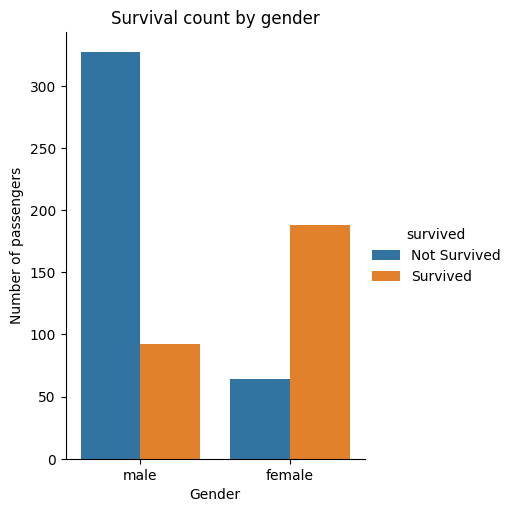

In [108]:
sns.catplot(data=df_cleaned,x='sex',hue='survived',kind='count',height=5,aspect=.8)
plt.title("Survival count by gender")
plt.xlabel("Gender")
plt.ylabel("Number of passengers")
plt.show()

From the graph though,we can clearly tell that a higher number of women survived compared to men.
Additionally we can tell that men had a higher death rate

#### 2.Does survival rate change with passenger class?

My assumption: Survivability decreased down the classes meaning that 1st class folks had a higher chnace of survival

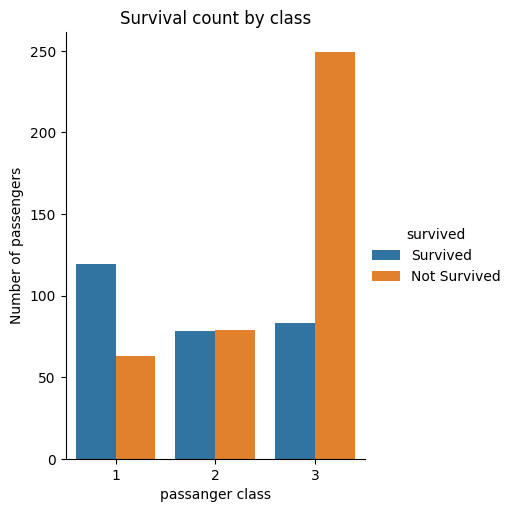

In [109]:
sns.catplot(data=df_cleaned,x='pclass',hue='survived',kind='count',height=5,aspect=.8)
plt.title("Survival count by class")
plt.xlabel("passanger class")
plt.ylabel("Number of passengers")
plt.show()

As previously predicted,1st class passengers had a higher survival rate as compared to their 2nd class and 3rd class counterparts.
It is also important to note the tiny difference between deaths and survivors in the 2nd class.

#### 3.What age group had the highest chance of survival?

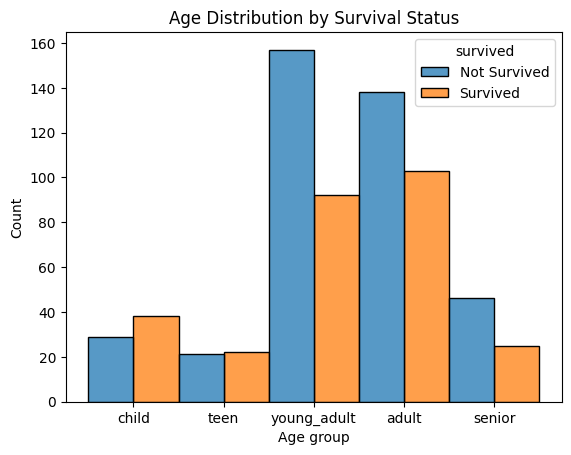

In [110]:
sns.histplot(data=df_cleaned,x='age_group',hue='survived',multiple='dodge')
plt.title('Age Distribution by Survival Status')
plt.xlabel("Age group")
plt.ylabel("Count")
plt.show()

##### Conclusions:
Children had a higher survival rate; its only in this category where the survived outnumber the deaths.
Young adults and adults had the highest number of casualties.
This might suggest that perhaps childrens' lives were prioritized as compared to younf adults and adults

So far we have noticed the following:

1. Children survived more while young adults and adults had a higher casualty numbers. Young adults having the higest numbers.
2. The first class passangers survived "more" than the 3rd class passangers.
3. Women had a higher survival rate than their male counterparts.

This makes us question whether age,class and gender together affect survival.We ask the questions:
1. Were younger people mostly in the lower classes (specifically 3rd class)?
2. Was survival higher when you combine 1st class,being a woman and certain age groups?

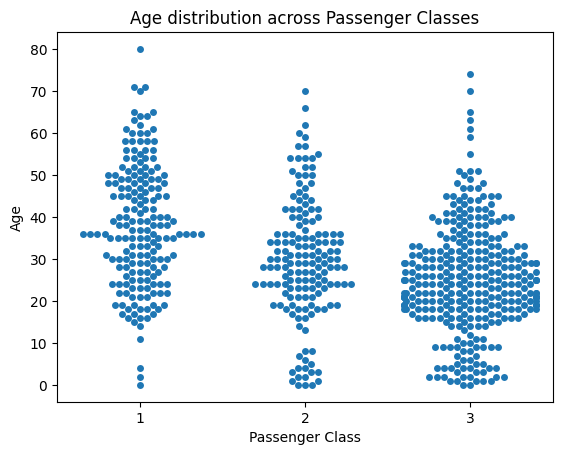

In [120]:
sns.swarmplot(data=df_cleaned, x='pclass', y='age')
plt.title("Age distribution across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


The swarm plot clearly shows that the majority of passengers were in third class, with a large number being young adults and adults.
A significant portion of children and teens were also found in third class.
However, despite their class disadvantage, children had higher survival rates — likely due to the prioritization of saving younger passengers (children and teens) during the evacuation.

That survival rates in the third class and in young adults and adults  were lower,have been so far backed by the data provided

But we need to understand how women,another possible factor, were distributed across the classes.Was their survival higher because they purchased more 1st class tickets?

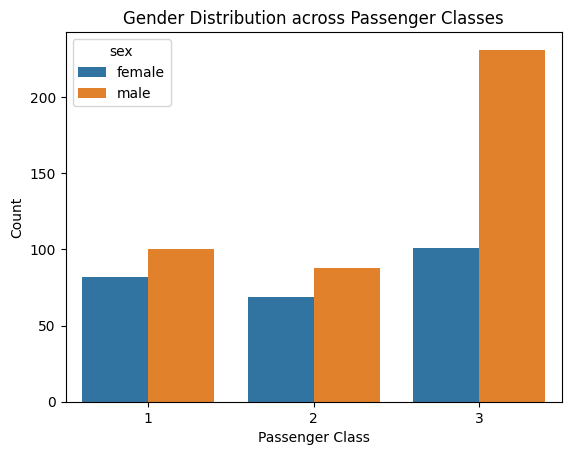

In [121]:
sns.countplot(data=df_cleaned, x='pclass', hue='sex')
plt.title("Gender Distribution across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()


From this we can see that there's a higher number of men in the third class.This provides a possible explanation as to why more women survived.It is,however,important to note that women aboard the titanic were generally few.

Now let us combine gender and class:

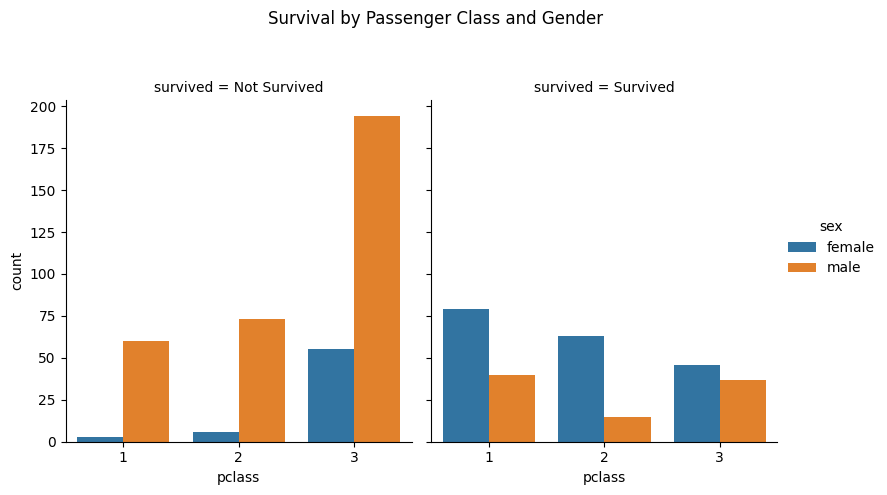

In [ ]:
sns.catplot(data=df_cleaned,x='pclass',hue='sex',col='survived',kind='count',height=5,aspect=0.8)
plt.subplots_adjust(top=0.8)
plt.suptitle("Survival by Passenger Class and Gender")
plt.show()


By just plotting comparing age and class,we can tell the following:
1. Regardless of class,male survival rate was lower than their male counterparts.
2. There are less women in the first class ,however,their survival rate remained higher.
3. There is a significant differnce between male and female survival rates across all classses regardless of survival rate
4. Women in the third class had a higher death rate as compared to women in other classes

We can therefore proceed with adding the factor of age:

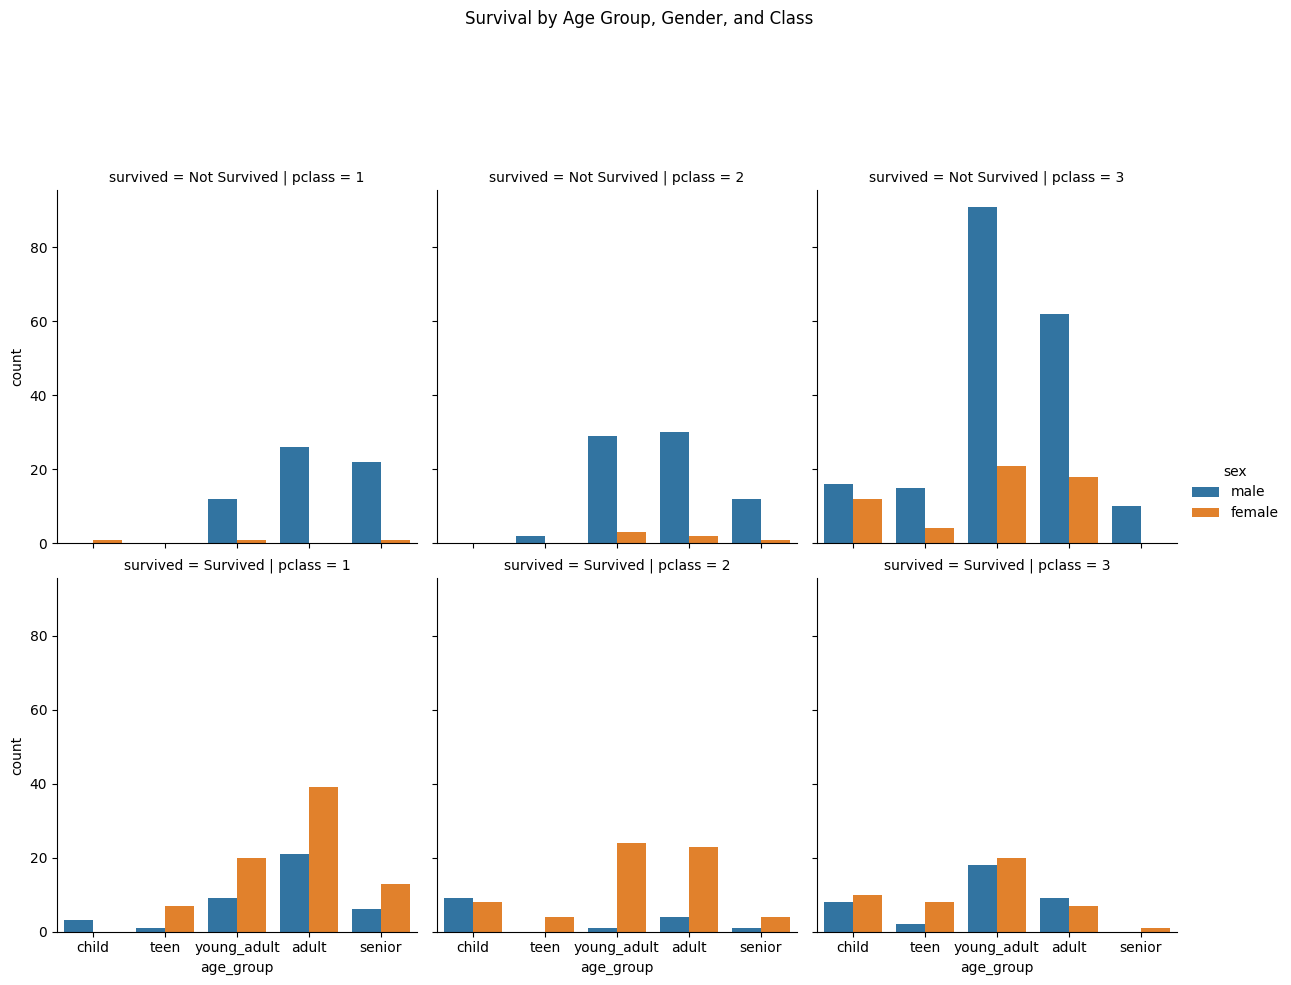

In [124]:
sns.catplot(
    data=df_cleaned,
    x='age_group',     
    hue='sex',         
    col='pclass', 
    row='survived',   
    kind='count',      
    height=5,          
    aspect=0.8         
)
plt.subplots_adjust(top=0.8)  # Adjust space at the top
plt.suptitle("Survival by Age Group, Gender, and Class")
plt.show()


From the chart,we can conclude the following:
1. Male survival rate  was lower across all age groups and classes
2. Female survival rate was higher across all age groups and classes with the expection of the female children who don't seem to have been on board

This therefore means that a women in the first class was more likely to survive than the other classes.
Additionally,children survival rate was higher than the adults and young adults.